# Part I - Prosper loan datas (données de pret de Prosper)
## by (Armel Elysé TITIL BASSOCK)

## Introduction

> Un pret est le fait pour un établissement de crédit, de proposer une solution de financement, en mettant à disposition des fonds à un bénéficiaire, sans en exiger le remboursement immédiat. Dans ce document, nous allons étudier un ensemble de données de pret, fournit par Prosper. 

> Ce jeu de données comprend un ensemble 113 937 prêts avec 81 variables sur chaque prêt, y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres. 

> **Exploitation**: Dans le but de retirer des informations utiles de ce jeu de données, nous nous posons les questions suivantes :᷆

> <ul>
    <li>Quels facteurs affectent le statut du résultat d'un pret ? </li>
    <li>QU'est ce qui affecte l'APR ou le taux d̀intéret de l'emprunteur ?</li>
    <li>Existe-t-il des différences entre les prets en fonction de l'importance du montant initialement emprunté ?</li>
</ul>





## Traitement ou nettoyage préliminaire 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas.api.types

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Lecture du fichier
df_loan = pd.read_csv('prosperLoanData.csv')

### Quelle est la structure de ce jeu de données ?

In [96]:
# Structure du dataset
df_loan.shape

(113937, 67)

> Ce jeu de données compte 113 937 lignes et 81 colonnes

### Que pouvons nous observer de ce jeu de données? (Evaluation)

In [4]:
# changer le nombre de colonnes a afficher
pd.set_option('display.max_columns',None)

In [5]:
# changer le nombre de lignes a afficher
pd.set_option('display.max_rows',None)

In [6]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

> D'une première observation visuelle, nous pouvons constater qu'il existe des colonnes avec des valeurs manquantes, que certaines colonnes peuvent etre de type categorie ou Datetime et certaines colonnes de type numérique sont mal formatées.

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### Y a-t-il des doublons dans notre jeu de donnees ?

> On verifie s'il existe des doublons dans notre jeu de donnees

In [9]:
# Afficher le nombre de doublons
df_loan.duplicated().sum()

0

> Non notre jeu de donnees ne comporte aucun doublon

### nombre de valeurs unique

> Nous suspectons les colonnes 'ListingKey' et 'LoanKey' de representer des cles pour les memes enregistrements. Nous evaluerons alors le nombre de valeurs uniques de ces cles et s'il est le meme on pourra conclure qu'ils representent les memes enregistrements. Nous ferons de meme pour la colonne 'LoanNumber'

In [10]:
# Nombre de valeurs uniques dans la colonne ListingKey
df_loan['ListingKey'].nunique()

113066

In [12]:
#Nombre de valeurs uniques dans la colonne LoanKey
df_loan['LoanKey'].nunique()

113066

In [14]:
#Nombre de valeurs uniques dans la colonne LoanNumber
df_loan['LoanNumber'].nunique()

113066

> Les 3 colonnes ont le meme nombre de valeurs uniques donc elles representent les memes enregistrements. Nous allons supprimer les colonnes 'LoanKey' et 'LoanNumber'

In [16]:
#Suppression des colonnes LoanKey et LoanNumber
df_loan.drop(columns =['LoanKey','LoanNumber'], inplace = True)

In [17]:
#Nombre de colonnes ayant des valeurs nulles
df_loan.isna().any()[lambda x: x].sum()

43

> 43 colonnes possèdent des valeures nulles. Celles qui en contiennent le plus sont 'CreditGrade', 'Groupkey'

### La colonne 'CreditGrade'


> On constate que cette colonne compte trop de valeurs manquantes. Que devrions nous faire de cette colonne ?
Effectuons une observation de cette colonne en particulier et de notre dataset en general

In [18]:
#valeurs uniques de la colonne CreditGrade
df_loan['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [19]:
#valeurs uniques de la colonne ProsperRating (alpha)
df_loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [20]:
#valeurs uniques de la colonne ProsperRating (numeric)
df_loan['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

> Nous observons tout d'abord que la colonne 'CreditGrade' (valable avant 2009) a des valeurs semblables a la colonne 'ProsperRating (Alpha)' (valable apres 2009) ce qui suggere que ces colonnes peuvent etre jointes. 

> De plus, la colonne 'ProsperRating (numeric)' a la meme valeur d'information que la colonne 'ProsperRating (Alpha)' nous pouvons donc la supprimer

> La colonne 'ProsperScore' a trop de valeurs manquantes  elle peut etre supprimee

In [21]:
# Suppression des colonnes 'ProsperRating (numeric)' et 'ProsperScore'
df_loan.drop(columns =['ProsperRating (numeric)','ProsperScore'], inplace = True)

In [23]:
# On cree une colonne vide CreditRating 
df_loan['CreditRating']= np.nan

# On lui assigne la valeur de la colonne 'CreditGrade' si elle existe et 'ProsperRating (Alpha)'  
# dans le cas contraire
for i in df_loan.index :
    df_loan.CreditRating[i] = df_loan['CreditGrade'][i]
    if df_loan['CreditGrade'][i] is np.nan :
        df_loan.CreditRating[i] = df_loan['ProsperRating (Alpha)'][i]
        
# On va ensuite remplacer les cellules vides restantes par 'ND' qui signifiera non definie

df_loan.CreditRating.fillna('ND', inplace = True)

# On supprimme les colonnes 'CreditGrade' et 'ProsperRating (Alpha)'
df_loan.drop(columns = ['CreditGrade', 'ProsperRating (Alpha)'], inplace = True)

In [24]:
#Valeurs uniques de la colonne CreditRating
df_loan.CreditRating.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
ND      131
Name: CreditRating, dtype: int64

In [25]:
df_loan.shape

(113937, 76)

In [26]:
#valeurs uniques de la colonne ListingCategory (numeric)
df_loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

### colonnes  avec trop de valeurs manquantes 
> La colonne 'GroupKey' , les colonnes d'index 51 a 58 et la colonne 'LoanFirstDefaultedCycleNumber' ont trop de valeurs manquantes et ne presente aucun interet pour notre etude elle peut donc etre supprimee

#### Colonne 'GroupKey' et 'LoanFirstDefaultedCycleNumber'

> Ces colonnes ne presentent pas d'interet pour notre etude elles seront supprimees

In [27]:
#suppression des colonnes GroupKey, LoanFirstDefaultedCycleNumber
df_loan.drop(columns = ['GroupKey', 'LoanFirstDefaultedCycleNumber'], inplace = True)

#### Colonnes d'index [51 - 58]
> Ces colonnes nous proposent des donnees sur les prets Prosper. Pour notre etude nous allons creer une colonne 'AnyProsper' qui dira si un pret a deja ete prosper ou non et nous allons supprimer ces colonnes

In [28]:
# on cree une serie TPL qui vaut 'False' si 'TotalProsperLoans' a une valeur et 'True' si elle est vide
TPL = df_loan['TotalProsperLoans'].isna()

# On initialise 'AnyProsper' a True et on lui donne la valeur False si il y a un vide (TPL = True)
df_loan['AnyProsper'] = True

for i in df_loan.index :
    if TPL[i] == True :
        df_loan.AnyProsper[i] = False
        
# On supprime les colonnes superflues
df_loan.drop(df_loan.loc[:,'TotalProsperLoans':'ScorexChangeAtTimeOfListing'], axis = 1, inplace = True)

In [29]:
#valeurs de AnyProsper
df_loan['AnyProsper'].value_counts()

False    91852
True     22085
Name: AnyProsper, dtype: int64

#### Colonne 'ClosedDate'

> La colonne 'LoanStatus' est assez bien referencee cette colonne n'est pas utile pour notre etude et sera donc supprimee

In [30]:
#Suppression de la colonne ClossedDate
df_loan.drop('ClosedDate', axis = 1, inplace = True)

### Donnees de type incorrect

#### CreditRating
> Cette colonne contient une notation des grades ou score de selon les positions suivantes 1-AA 2-A 3-B 4-C 5-D 6-E 7-HR 8-NC 9-ND. Il s'agit donc de donnees categorielles ordonnees. Nous allons ainsi changer leur type.

In [31]:
# Definir une nouvelle categorie CR_type
CR_type = pd.CategoricalDtype(categories = ['AA','A','B','C','D','E','HR','NC','ND'], ordered =True)
#affecter cette categorie a CreditRating
df_loan.CreditRating =df_loan['CreditRating'].astype(CR_type)

In [33]:
df_loan.CreditRating.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC', 'ND'], ordered=True)

#### Loan status
Cette colonne contient l'etat des prets. Il n'y a pas d'ordre inherent il s'agit de donnees categorielles non ordonnees

In [34]:
df_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [35]:
df_loan.LoanStatus = df_loan.LoanStatus.astype('category')

#### ListingCategory
 Cette colonne represente la categorie deml'annonce selectionnee. De prime a bord ces categories sont non ordonnees nous allons creer une nouvelle colonne avec le libelle de cette colonne.

In [36]:
# creation de la liste des champs correspondant aux categories d'annonce
ListCat = ['Non disponible','consolidation de dette', 'amelioration de habitat','Entreprise','Pret personnel','Usage etudiant','Auto', 'Autre', 'Bebe et adoption','Bateau','Procedure cosmetique', 'bague de fiancaille','Pret vert','depense du menage', 'gros achat', 'medical/dentaire','moto', 'VR', 'taxes', 'vacances', 'Prets']

# creation de la colonne ListingCategory 
df_loan['ListingCategory'] = df_loan.apply (lambda row : ListCat[row['ListingCategory (numeric)']], axis = 1)

In [37]:
df_loan.ListingCategory.value_counts()

consolidation de dette     58308
Non disponible             16965
Autre                      10494
amelioration de habitat     7433
Entreprise                  7189
Auto                        2572
Pret personnel              2395
depense du menage           1996
medical/dentaire            1522
taxes                        885
gros achat                   876
Prets                        771
vacances                     768
Usage etudiant               756
moto                         304
bague de fiancaille          217
Bebe et adoption             199
Procedure cosmetique          91
Bateau                        85
Pret vert                     59
VR                            52
Name: ListingCategory, dtype: int64

#### BorrowerState
> Represente une liste non ordonnee d'Etats (abbrege sur 2 lettres) on va changer le type en categorie

In [38]:
# conversion du type BorrowerState en category
df_loan.BorrowerState = df_loan.BorrowerState.astype('category')

#### Occupation
> Represente une liste non ordonnee de professions. On va les transformer en categorie

In [97]:
# conversion du type Occupation en category
df_loan.Occupation = df_loan.Occupation.astype('category')

#### EmploymentStatus
> Statut de travail de type categorielle non ordonnee.

In [40]:
#conversion du type de EmployedStatus en category
df_loan.EmploymentStatus = df_loan.EmploymentStatus.astype('category')

In [41]:
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### IncomeRange

In [42]:
df_loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [43]:
# conversion du type de la colonne IncomeRange
IR_type = pd.CategoricalDtype(categories = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed'], ordered = True)

df_loan.IncomeRange= df_loan['IncomeRange'].astype(IR_type)


#### LoanOriginationQuarter
> Presente les trimestres pendant lesquels le pret a ete sollicite. Nous allons transformer cette colonne en categorie pour avoir les valeurs Q1, Q2, Q3 et Q4 pour representer les 4 trimestres.

In [44]:
# Extraction de la premiere chaine de caractere de la colonne LoanOriginationQuarter
df_loan.LoanOriginationQuarter = df_loan['LoanOriginationQuarter'].str.split('\s+').str[0]

In [45]:
#Conversion du type de la colonne LoanOriginationQuarter
LOQ_type = pd.CategoricalDtype(categories = ['Q1','Q2','Q3','Q4'], ordered = True)
df_loan.LoanOriginationQuarter = df_loan.LoanOriginationQuarter.astype(LOQ_type)

In [46]:
df_loan.LoanOriginationQuarter.dtypes

CategoricalDtype(categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)

In [47]:
df_loan.LoanOriginationQuarter.value_counts()

Q4    31386
Q1    29678
Q3    27967
Q2    24906
Name: LoanOriginationQuarter, dtype: int64

In [48]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 67 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   ListingKey                          113937 non-null  object  
 1   ListingNumber                       113937 non-null  int64   
 2   ListingCreationDate                 113937 non-null  object  
 3   Term                                113937 non-null  int64   
 4   LoanStatus                          113937 non-null  category
 5   BorrowerAPR                         113912 non-null  float64 
 6   BorrowerRate                        113937 non-null  float64 
 7   LenderYield                         113937 non-null  float64 
 8   EstimatedEffectiveYield             84853 non-null   float64 
 9   EstimatedLoss                       84853 non-null   float64 
 10  EstimatedReturn                     84853 non-null   float64 
 11  ListingCatego

#### ListingCreationDate, DateCreditPulled, LoanOriginationDate
> Ce sont des colonnes de type date nous allons les reformater

In [49]:
# Conversion du type des 3 colonnes de temps
df_loan.ListingCreationDate = pd.to_datetime(df_loan.ListingCreationDate)
df_loan.DateCreditPulled = pd.to_datetime(df_loan.DateCreditPulled)
df_loan.LoanOriginationDate = pd.to_datetime(df_loan.LoanOriginationDate)

In [50]:
# Enregistrement de notre jeu de donnees nettoye
df_loan_clean = df_loan

In [51]:
df_loan_clean.to_csv('df_loan_clean.csv', index=False)

### What is the structure of your dataset?

> notre jeu de donnees initial a 113937 lignes et 81 colonnes.

### What is/are the main feature(s) of interest in your dataset?

> Les caracteristiques d'interet principales sont :
> <ul>
    <li>LoanStatus -- statut du pret</li>
    <li>BorrowerAPR -- taux annuel effectif global de l'emprunteur</li>
    <li>BorrowerRate -- Taux d'interet de l'emprunt pour ce pret</li>
    <li>LenderYield -- Rendement du preteur </li>
    <li>LoanOriginalAmount -- montant initial du pret</li>
  </ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Les caracteristiques utiles pour les investigations sont:
> <ul>
    <li>ListingCreationDate -- Date de creation de la liste</li>
    <li>ListingCategory -- categorie de l'annonce selectionnee par l'emprunteur</li>
    <li>BorrowerState -- Etat de l'emprunteur</li>
    <li>Occupation -- profession de l'emprunteur au moment de l'emprunt</li>
    <li>IsBorrowerHomeOwner -- l'emprunteur est il proprietaire ?</li>
    <li>CurrentlyInGroup -- l'emprunteur est il dans un groupe</li>
    <li>CurrentDelinquencies -- Credit en souffrance</li>
    <li>IncomeRange -- Tranche de revenu</li>
    <li>LoanOriginationQuarter -- trimestre du pret</li>
    <li>CurrentDelinquencies -- metier n'ayant jamais eu de credit en souffrance</li>
    <li>CreditRating -- Note de credit suivant la notation alpha</li>
    <li>AnyProsper -- le pret est il prosper ou non</li>
    <li>LoanMonthSinceOrigination -- Nombre de mois depuis la creation du pret</li>
  </ul>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Quel est le statut de pret le plus important de notre table de donnees?

In [52]:
df_loan_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

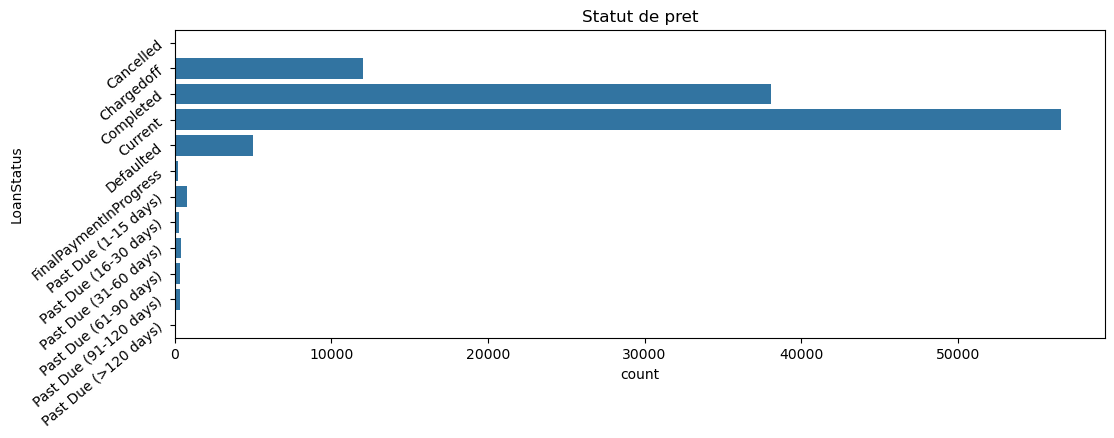

In [53]:
#Affichage du diagramme a bar horizontal des frequences des differents status de pret 
plt.figure(figsize =[12,4])
plt.title('Statut de pret')

base_color = sb.color_palette()[0]

#diagramme a barre horizontale seaborn
sb.countplot(data = df_loan_clean, y = 'LoanStatus', color = base_color)
plt.yticks(rotation = 40);


> Les status de pret les plus frequents sont Current, Completed, Chargedoff, Defaulted. On constate egalement que les occurences des 'Past Due' mal reparties ce qui nous donne des observations faibles. Nous allons les regrouper

In [54]:
# On supprimme dans toutes les valeurs, les caracteres apres le premier mot
df_loan_clean.LoanStatus = df_loan_clean.LoanStatus.str.split('\s+').str[0]

In [55]:
#Changer le mot Pasr par PastDue dans le dataset
df_loan_clean.LoanStatus.replace('Past','PastDue', inplace = True)

In [56]:
#valeurs uniques de la colonne LoanStatus 
df_loan_clean.LoanStatus.str.split('\s+').str[0].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
PastDue                    2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [57]:
#On cree la liste des valeurs de LoanStatus
LS_order = df_loan_clean.LoanStatus.value_counts().index

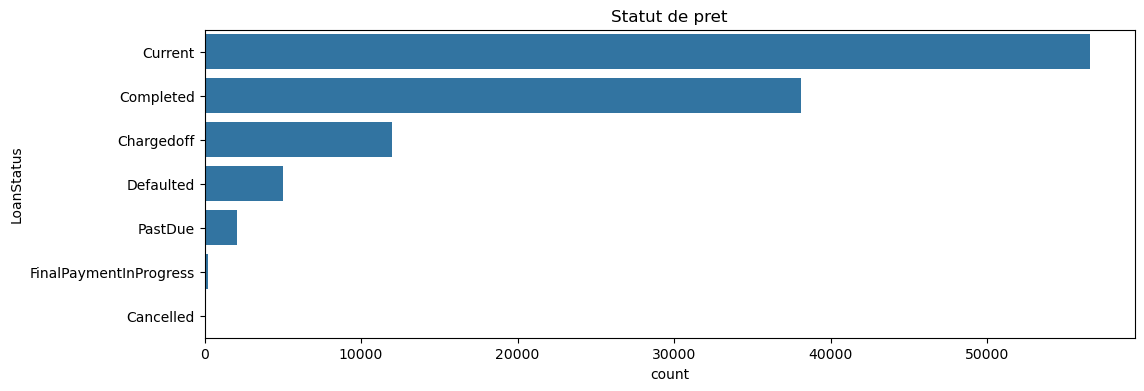

In [58]:
#Diagramme a bar horizontale de LoanStatus
plt.figure(figsize =[12,4])
plt.title('Statut de pret')

base_color = sb.color_palette()[0]

sb.countplot(data = df_loan_clean, y = 'LoanStatus', color = base_color, order = LS_order);


#### Quelle est la distribution du taux annuel d'emprunt general?

> Nous l'observerons a travers un histogramme

In [111]:
# On defini la fonction histogram pour nous aider a tracer des histogrammes univaries
def histogram (columns, mins, step):
    plt.figure(figsize = (10,4))
    
    bins = np.arange(mins, df_loan_clean[columns].max()+step, step)
    plt.hist(data = df_loan_clean, x = columns, bins = bins)
    plt.xlabel(columns)
    plt.ylabel('frequence')

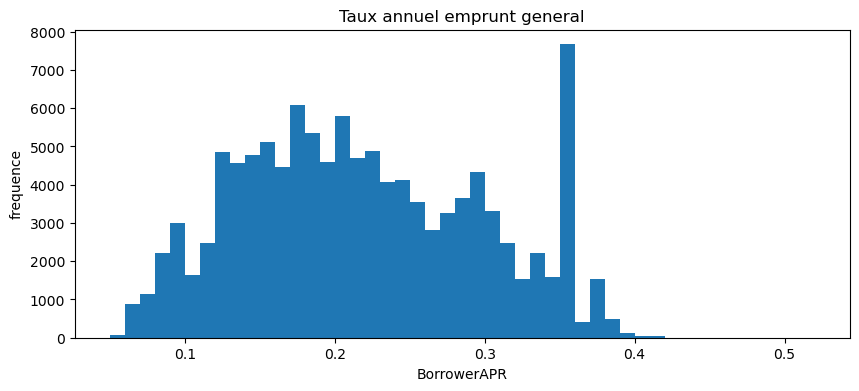

In [113]:
#Histogramme  de BorrowerAPR
histogram('BorrowerAPR', 0.05, 0.01)

plt.title('Taux annuel emprunt general');

> Nous observons une distribution multimodale avec un mode maximum aux alentours de 0.4

#### Quelle est la distribution du taux actuel de l'emprunt actuel?

> Nous l'observerons a travers un histogramme

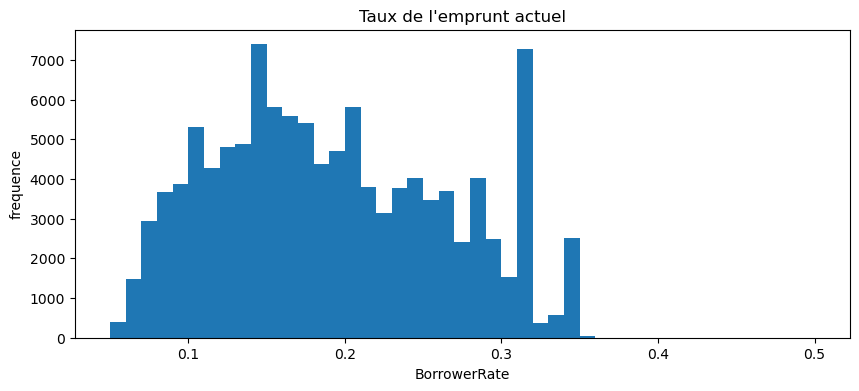

In [114]:
# Histogramme BorrowerRate
histogram('BorrowerRate', 0.05, 0.01)

plt.title('Taux de l\'emprunt actuel');

> Nous observons une distribution multimodale avec un mode maximum aux alentours de 0.15

#### Quelle est la distribution du montant initial du pret?

> nous le representerons au sein d'un histogramme

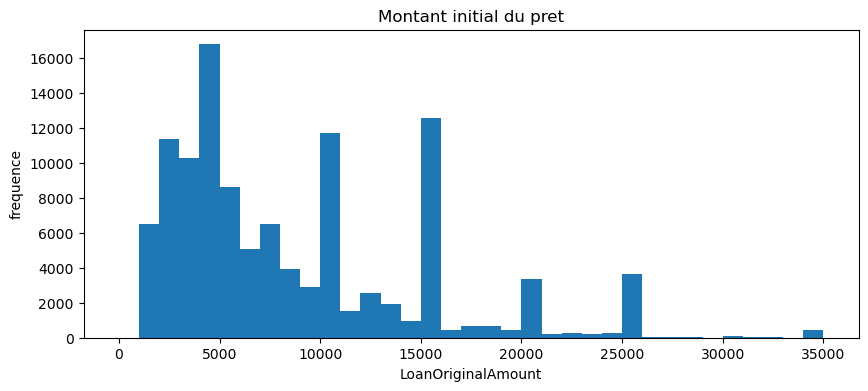

In [115]:
# Histogramme LoanOriginalAmount
histogram('LoanOriginalAmount', 0, 1000)
plt.title('Montant initial du pret');

> Nous observons une distribution multimodale avec un mode maximum aux alentours de 5000.

#### Quelle est la distribution du rendement du preteur ?

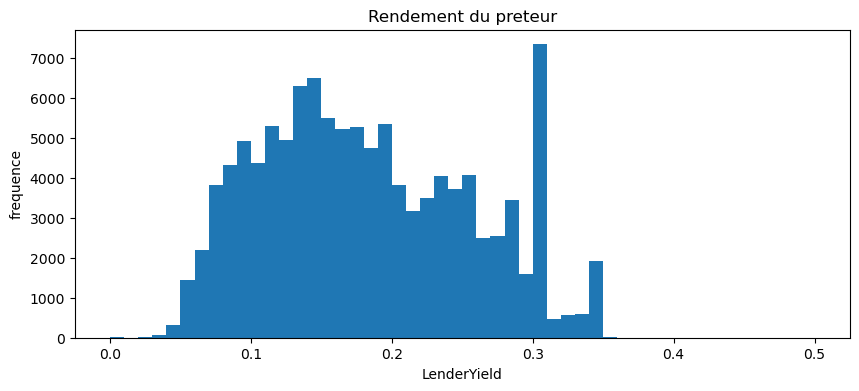

In [118]:
#Histogramme LenderYield
histogram('LenderYield', 0, 0.01)
plt.title('Rendement du preteur');

Ici egalememnt nous avons plusieurs modes mais la frequence maximale est atteinte aux alentours de 0.3

#### Quel est le trimestre pendant lequel s'effectue le plus les pret?
> Nous allons commencer par une analyse temporelle en evaluant les trimestres pendant lesquels on observe un plus grand nombre de transactions 

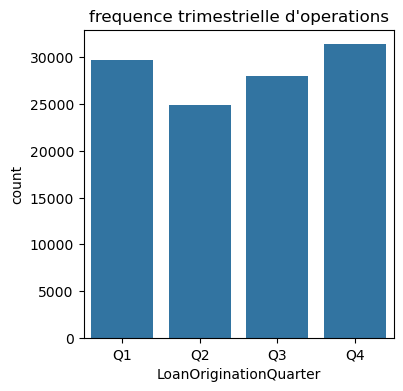

In [63]:
# Diagramme A barre des frequences de pret par trimestre d'operation
plt.figure(figsize =[4,4])
plt.title('frequence trimestrielle d\'operations')

base_color = sb.color_palette()[0]

sb.countplot(data = df_loan_clean, x = 'LoanOriginationQuarter', color = base_color);


>Le trimestre avec le plus d'operations est le trimestre 4 certainement a cause des fetes de fin d'annees.

#### Pour quelle raison demande t-on le plus un pret?

> Afin de repondre a cette question nous allons observer les frequences des differentes categories de pret presentent dans notre jeu de donnees. Nous presenterons alors les 7 meilleurs resultats

In [64]:
# On extrait les 10 meilleurs categories
LC_list = df_loan.ListingCategory.value_counts().head(10)

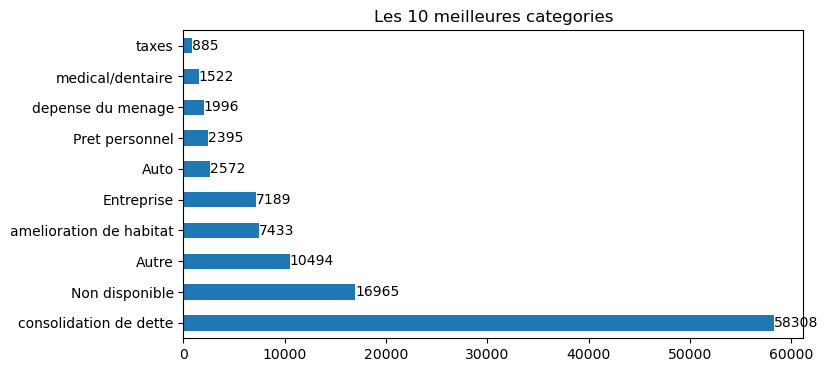

In [65]:
# taille de la figure
plt.figure(figsize =(8,4))

#On affiche la figure en annotant
ax = LC_list.plot(kind = 'barh', title ='Les 10 meilleures categories')
ax.bar_label(ax.containers[0]);


> la raison principale pour laquelle on demande un credit est la consolidation d'une dette anterieure

#### Tranche de revenu

> Nous inspectons les profils de revenus susceptibles de prendre le plus un prets

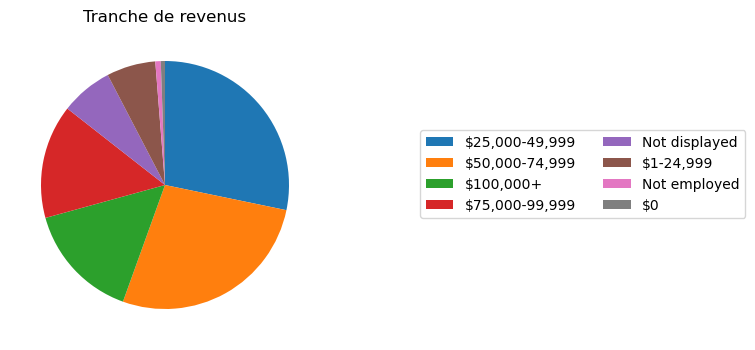

In [66]:
# Diagramme en camembert pour les tranches de revenu
sorted_counts = df_loan.IncomeRange.value_counts()
plt.figure(figsize =(4,19))
plt.pie(sorted_counts,  startangle = 90, counterclock = False)
plt.title('Tranche de revenus')
plt.legend(sorted_counts.index, bbox_to_anchor=(1.3, 0.7), ncol=2)
plt.show();

 > Nous constatons que les personnes a revenus intermediaires sont les plus a meme de demander un credit. Not employed peut revenir a un revenu de $O donc on peut les regrouper

#### La dette pese t'elle enormement sur le revenu pour les clients endettes?

Nous allons pour cela afficher un histogramme du ratio dette revenu

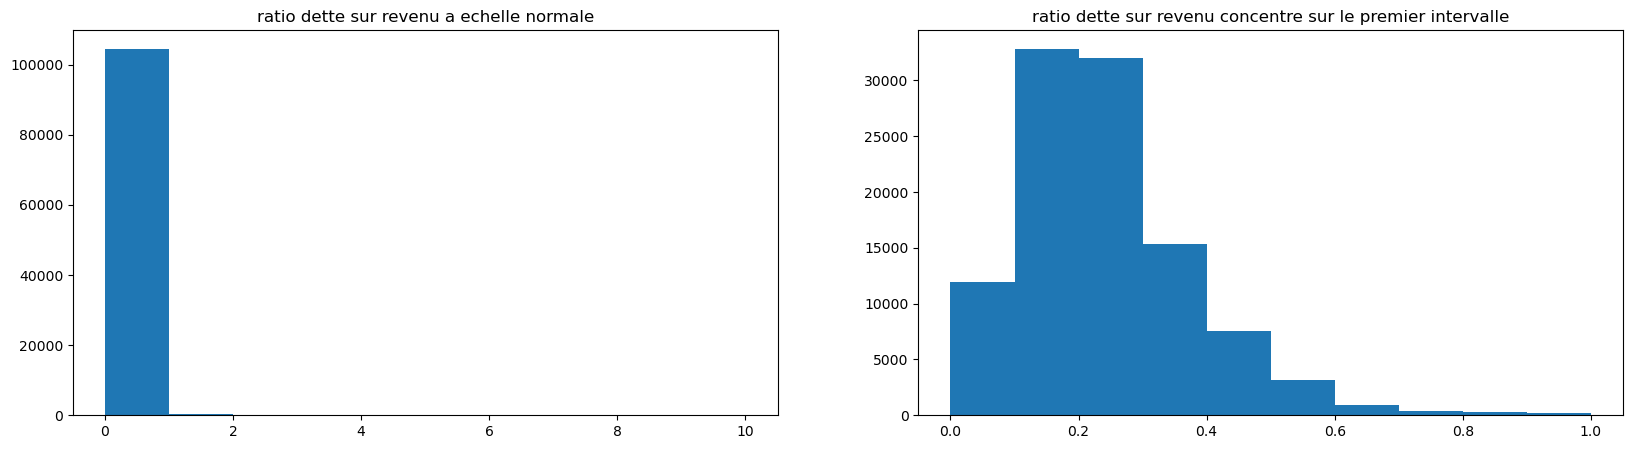

In [67]:
# Ratio de dette sur revenu
plt.figure(figsize = (20,5))

#On defini le ratio sur un pas de 1 pour observer tout dans l'ensemble
plt.title('ratio dette sur revenu')
plt.subplot(1, 2, 1)
bins = np.arange(0, 10+1, 1)
plt.hist(data = df_loan_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.title('ratio dette sur revenu a echelle normale')

#On defini l'echelle autour de 1 sur un pas de 0.1 pour observer les valeurs significatives
plt.subplot(1, 2, 2)
bins = np.arange(0, 1+0.1, 0.1)
plt.hist(data = df_loan_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.title('ratio dette sur revenu concentre sur le premier intervalle');

> On constate que le ratio de dette sur le revenu est pour la grande majorite autour de 0.2 ce qui signifie que les credits presentent un risque faible  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Quelles caracteristiques influencent le statut du pret ?

#### Le montant de pret demande permet il de rendre un pret plus facile a rembourser?

In [124]:
# fonction du trace de boite a moustache
def box (x_val, y_val):
    plt.figure(figsize =(20,5))
    base_color = sb.color_palette()[0]
    sb.boxplot(data=df_loan_clean, x= x_val, y= y_val,color = base_color) 
    

In [130]:
# Fonction de trace de diagramme a barre groupes
def groupbar (x_vals, hue_vals):
    plt.figure(figsize =[12,5])
    sb.countplot(data = df_loan_clean, x =x_vals,  hue = hue_vals)

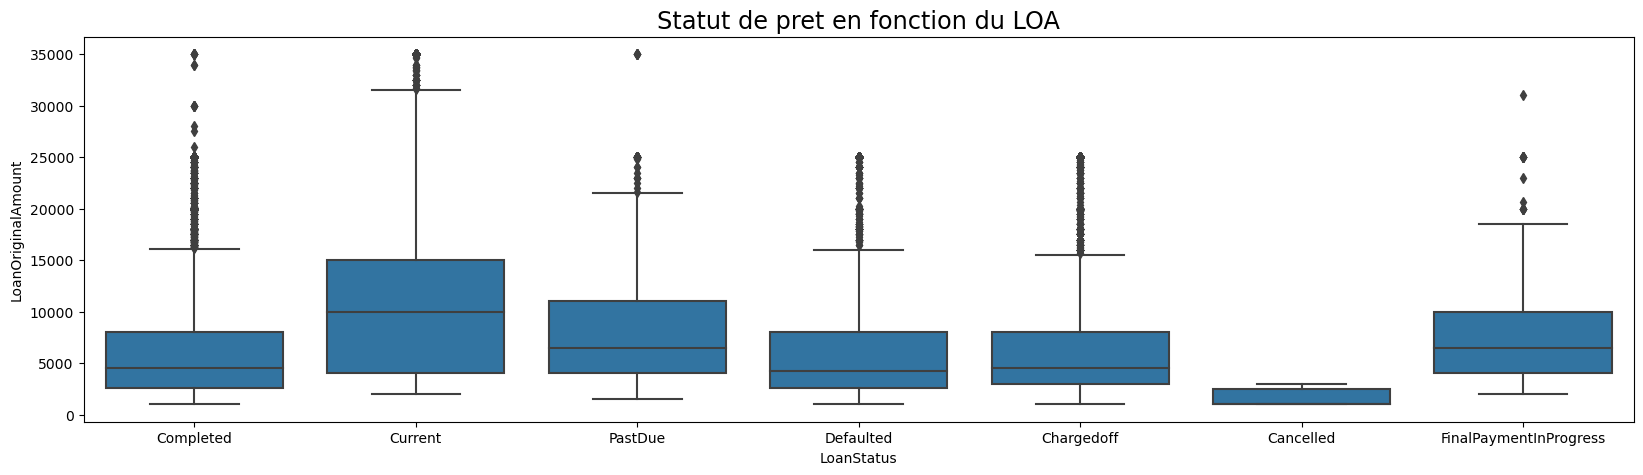

In [126]:
# Diagramme a moustache statut de pret et montant initial du pret
box('LoanStatus','LoanOriginalAmount')
plt.title('Statut de pret en fonction du LOA', fontsize = 'xx-large');

> On observe que les boites de chaque types de pret sont dans des intervalles assez proches donc cette caracteristique ne nous permet pas de conclure qu'un pret sera acheve avec succes

#### Le taux du pret permet il de rendre un pret plus facile a rembourser?

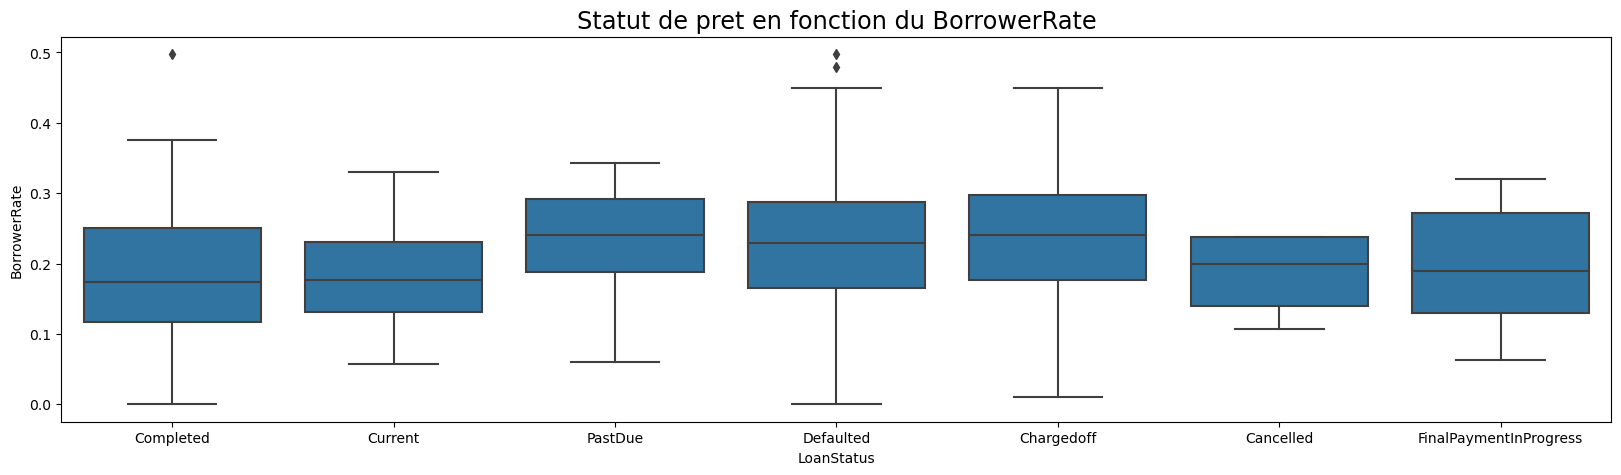

In [127]:
# Diagramme a moustache statut de pret et taux actuel de l'emprunteur
box('LoanStatus','BorrowerRate')
plt.title('Statut de pret en fonction du BorrowerRate', fontsize = 'xx-large');

> On observe que les boites de chaque types de pret sont dans des intervalles assez proches donc cette caracteristique ne nous permet pas de conclure qu'un pret sera acheve avec succes

#### Le statut de l'emploi rent- il de rendre un pret plus facile a rembourser?

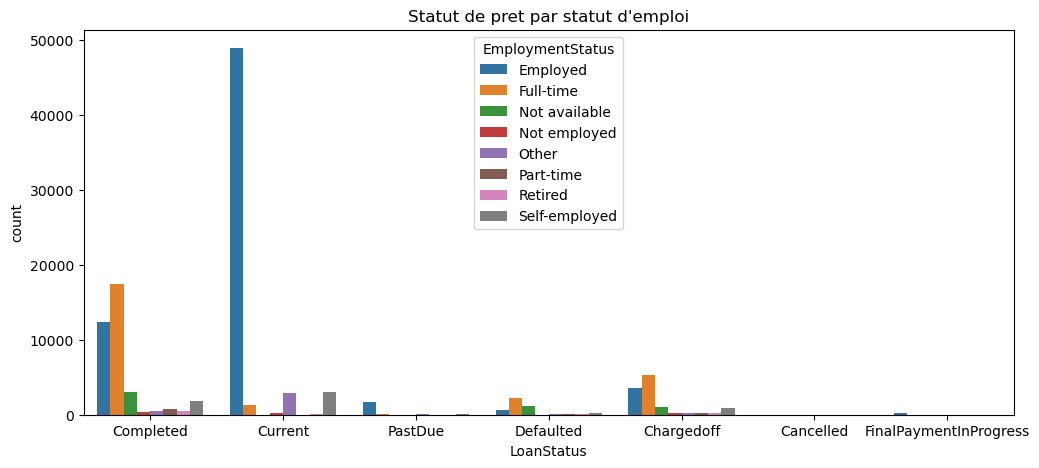

In [132]:
# diagramme a barre groupe de statut de pret en fonction des employes
groupbar('LoanStatus','EmploymentStatus')
plt.title('Statut de pret par statut d\'emploi');

> On constate que les personnes ayant un pret rembourse sont plus du type 'Employed' ou 'Full-time'.

#### La tranche de revenu permet-elle de rendre un pret plus facile a rembourser?

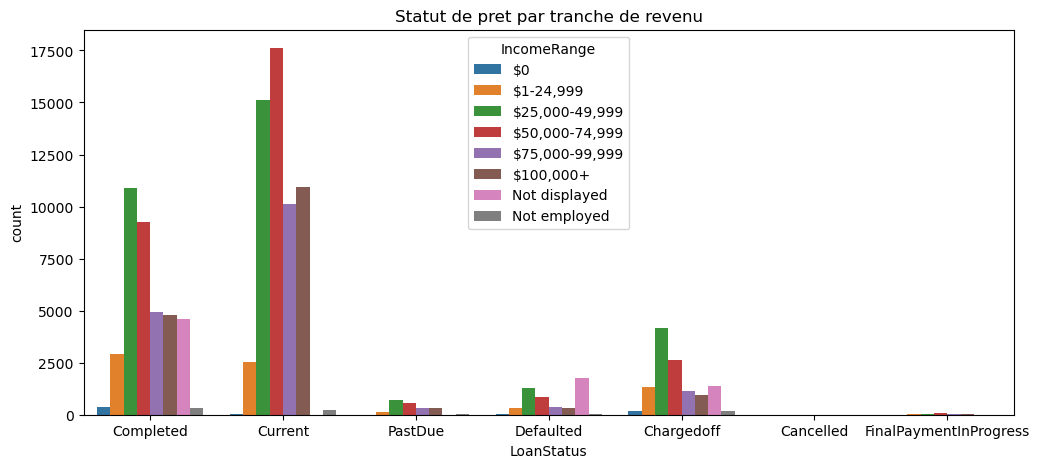

In [133]:
# diagramme a barre groupe de statut de pret en fonction de tranche de revenu
groupbar('LoanStatus','IncomeRange')
plt.title('Statut de pret par tranche de revenu');


> On comstate que la plupart des personnes dont le revenu est compris entre 25,000 dollars et 75,000 dollars completent leur pret ou sont en cours de remboursement

#### La mensualite de paiement  permet-elle de rendre un pret plus facile a rembourser?

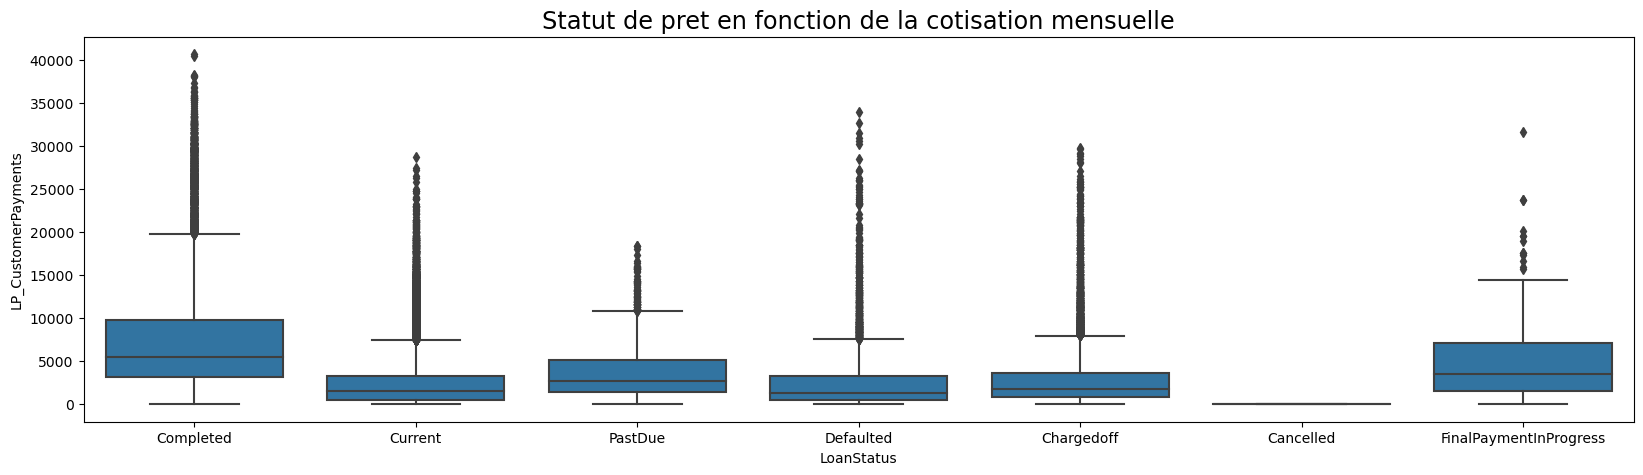

In [128]:
# Diagramme a moustache statut de pret et payement mensuel du client  
box('LoanStatus','LP_CustomerPayments')
plt.title('Statut de pret en fonction de la cotisation mensuelle', fontsize = 'xx-large');

> Les clients qui effectuent des payments d'environ 5000 dollars en moyenne ont plus de chance de completer leur pret ou d'etre en phase finale de paiement

#### Y a t-il une correspondance entre le statut d'un pret et le trimestre de l'annee ?

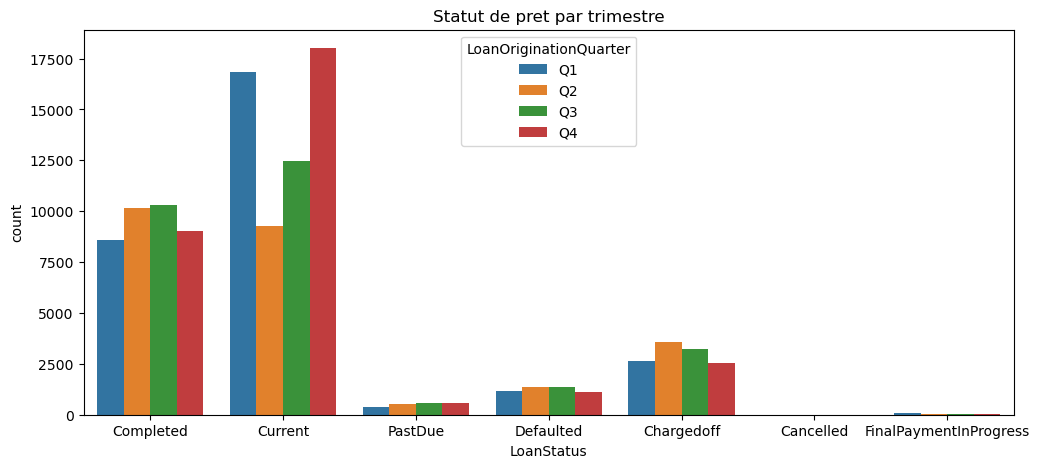

In [134]:
# diagramme a barre groupe de statut de pret en fonction de tranche de revenu
groupbar('LoanStatus','LoanOriginationQuarter')
plt.title('Statut de pret par trimestre');

La tendance de notre diagramme ne nous permet pas de conclure sur une quelconque relation

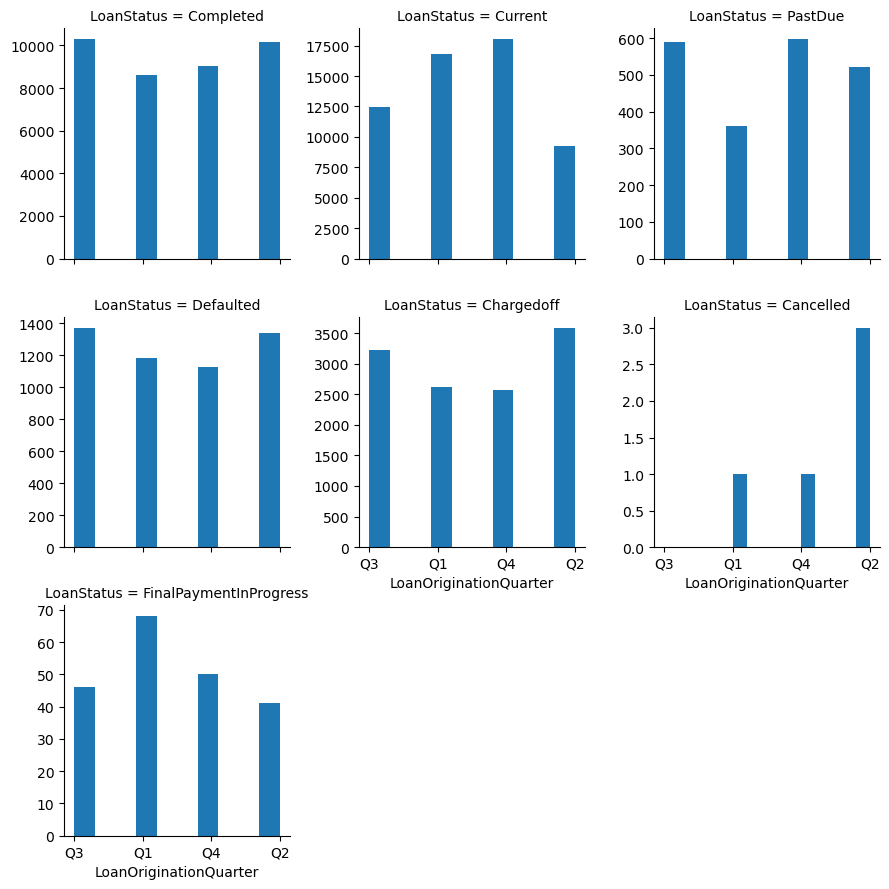

In [75]:
# FacetGrid statut de pret par trimestre
g = sb.FacetGrid(data = df_loan_clean, col = 'LoanStatus', col_wrap = 3,  sharey = False)
g.map (plt.hist, 'LoanOriginationQuarter');

> On constate ici que les credits les plus a meme d'etre complete sont ceux du deuxieme et du troisieme trimestre

## Qu' est ce qui influence l'APR ou le taux d'interet de l'emprunteur ?

####  Le taux alloue a l'emprunteur sur ce pret correspond t-il a son taux annuel ?

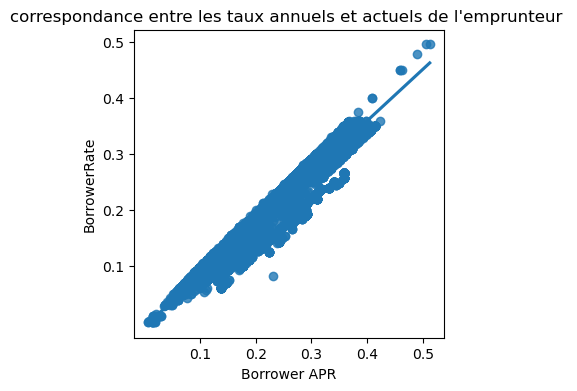

In [76]:
# droite de regression de correspondance entre BorrowerAPR et BorrowerRate
plt.figure(figsize=(4,4))
sb.regplot(data = df_loan_clean, x = 'BorrowerAPR', y = 'BorrowerRate') 
plt.xticks(np.arange(0.1, df_loan_clean.LenderYield.max()+0.1, 0.1))
plt.yticks(np.arange(0.1, df_loan_clean.LenderYield.max()+0.1, 0.1))
plt.xlabel('Borrower APR') 
plt.ylabel('BorrowerRate')
plt.title('correspondance entre les taux annuels et actuels de l\'emprunteur ');

> On observe une correlation forte des points autour de la droite de regression x=y donc dans l'ensemble on peut considerer que ces deux variables sont correspondantes.

####  Correspondance entre le taux annuel de l'emprunteur et son taux actuel

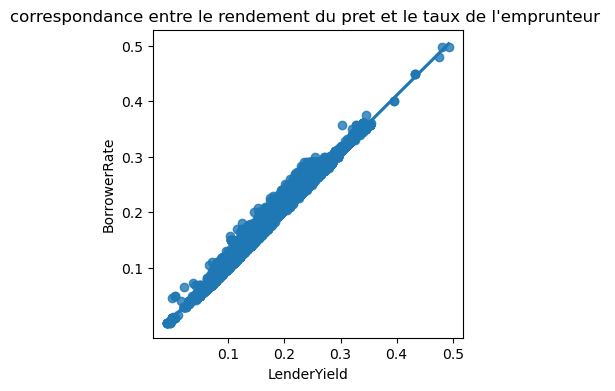

In [77]:
# droite de regression de correspondance entre BorrowerAPR et LenderYield
plt.figure(figsize=(4,4))
sb.regplot(data = df_loan_clean, x = 'LenderYield', y = 'BorrowerRate') 
plt.xticks(np.arange(0.1, df_loan_clean.LenderYield.max()+0.1, 0.1))
plt.yticks(np.arange(0.1, df_loan_clean.LenderYield.max()+0.1, 0.1))
plt.xlabel('LenderYield') 
plt.ylabel('BorrowerRate')
plt.title('correspondance entre le rendement du pret et le taux de l\'emprunteur ');

> On observe une correlation forte des points autour de la droite de regression x=y donc dans l'ensemble on peut considerer que ces deux variables sont correspondantes.

#### Existe t-il une relation entre le score de credit et le taux annuel de l'emprunteur?

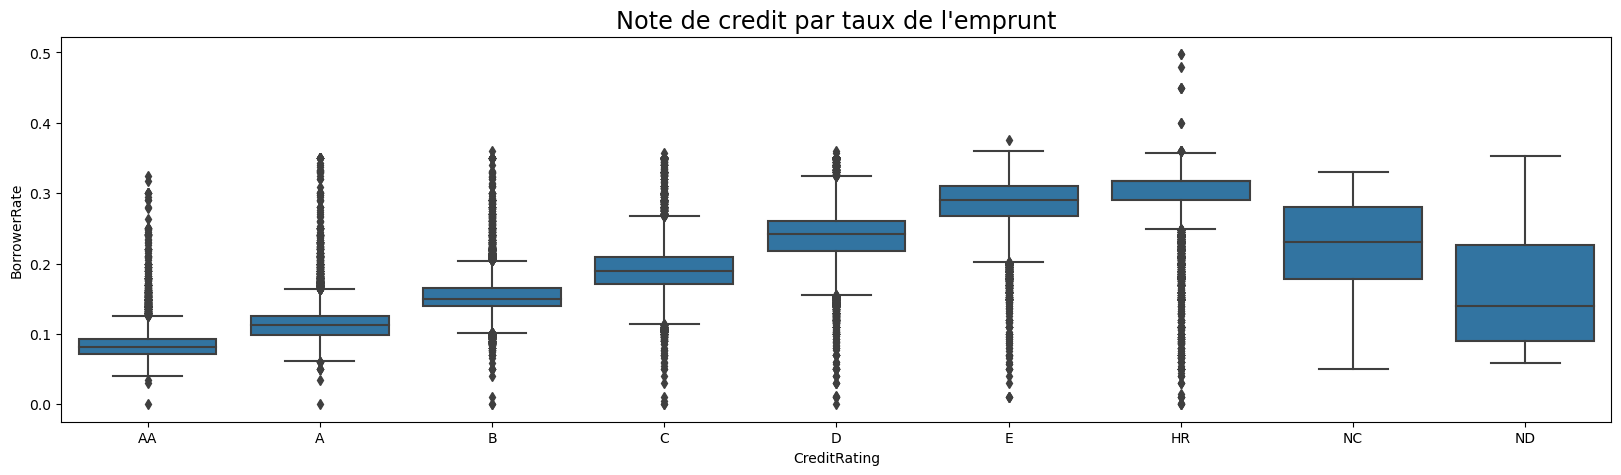

In [136]:
# Diagramme a moustache statut de pret et payement mensuel du client  
box('CreditRating','BorrowerRate')
plt.title('Note de credit par taux de l\'emprunt', fontsize = 'xx-large');

> les emprunteurs avec des credits de classe HR ont les taux d'interet les plus elevees selon les distributions mais avec un grand nombre de valeurs abberantes

#### le nombre d'investisseurs influence t-il la moyenne d'un emprunteur?

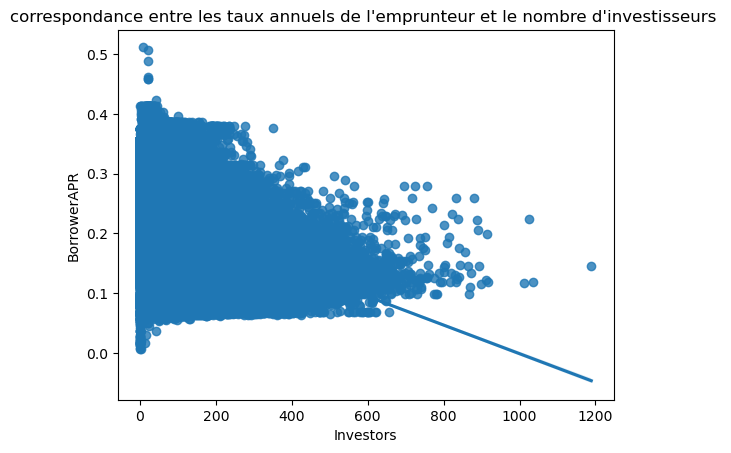

In [79]:
#Droite de regression de correspondance entre BorrowerAPR et Investors
sb.regplot(data = df_loan_clean, y = 'BorrowerAPR', x = 'Investors') 
plt.xlabel('Investors') 
plt.ylabel('BorrowerAPR')
plt.title('correspondance entre les taux annuels de l\'emprunteur et le nombre d\'investisseurs ');

> Il semble y avoir une regression descendante du taux annuel de l'emprunteur en fonction dunombre d'investisseur ainsi plus il y a d'investisseur plus le taux peut etre faible

#### Quels sont les etats ou l'emprunteur est susceptible d'avoir les taux les plus bas ?

In [80]:
df_loan_clean.BorrowerState.value_counts().nlargest(10)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
Name: BorrowerState, dtype: int64

In [81]:
# Top 10 des etats par borrowerAPR
Top10StateperAPR = df_loan_clean.groupby('BorrowerState')['BorrowerAPR'].mean().sort_values(ascending = False).tail(10)

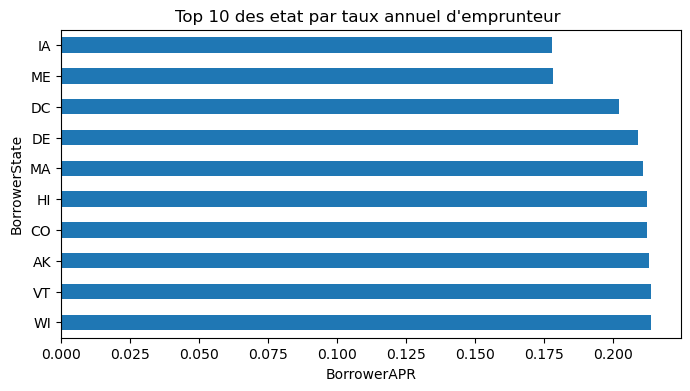

In [82]:
# taille de la figure
plt.figure(figsize =(8,4))

#On affiche la figure en annotant
Top10StateperAPR.plot(kind = 'barh', title ='Top 10 des etat par taux annuel d\'emprunteur ')
plt.xlabel('BorrowerAPR');

> Les 10 etats qui connaissent les taux d'emprunt les plus faibles sont __IA, ME , DC, DE, MA, HI, CO, AK, VT, WI__


#### Quels sont les metiers avec les taux d'emprunt les plus faibles ?

In [83]:
# Top !0 des borrowerAPR par occupation
Top10APRperOcc = df_loan_clean.groupby('Occupation')['BorrowerAPR'].mean().sort_values(ascending = False).tail(10)

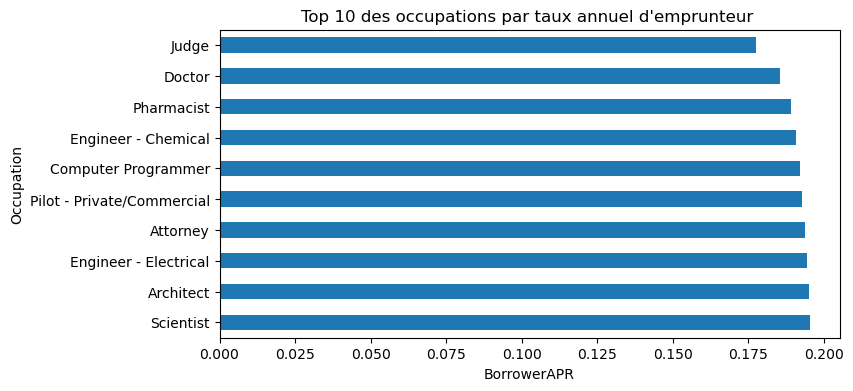

In [84]:
# taille de la figure
plt.figure(figsize =(8,4))

#On affiche la figure en annotant
Top10APRperOcc.plot(kind = 'barh', title ='Top 10 des occupations par taux annuel d\'emprunteur ')
plt.xlabel('BorrowerAPR');

> Les professions avec les taux d'emprunt les plus bas sont : __Juge, Docteur, Pharmacien, Ingenieur-Chimiste, Programmeur, Pilote, avocat, ingenieur electricien, architecte, scientifique.__

## Existe-t-il des différences entre les prets en fonction de l'importance du montant initialement emprunté?

#### Quels sont les notes de credits ayant les montants d'emprunt initial les plus importants ?

In [85]:
# Top  5 CreditRating par LOA
Top5CreditperAmount = df_loan_clean.groupby('CreditRating')['LoanOriginalAmount'].mean().sort_values(ascending = True).nlargest(5)

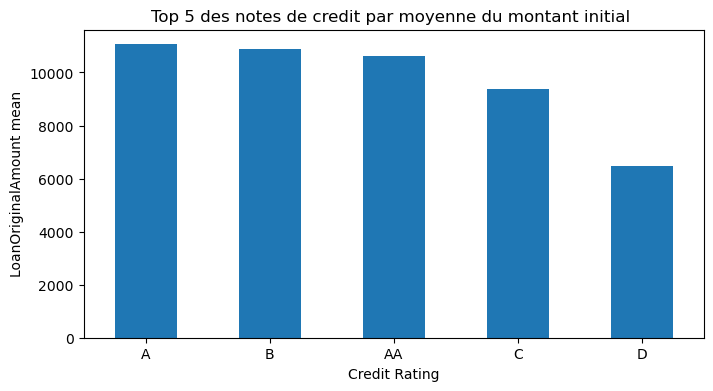

In [86]:
# taille de la figure
plt.figure(figsize =(8,4))

Top5CreditperAmount.plot(kind = 'bar', title ='Top 5 des notes de credit par moyenne du montant initial ')
plt.xlabel('Credit Rating')
plt.ylabel('LoanOriginalAmount mean')
plt.xticks(rotation = 0);

> En moyenne les credit ayant les scores AA, A et B sont de montants consequents  

#### Quels categories de credits portent sur les montants les plus importants ?

In [87]:
#Top 7 des categories par LOA
Top7CatperAmount = df_loan_clean.groupby('ListingCategory')['LoanOriginalAmount'].mean().sort_values(ascending = True).nlargest(7)

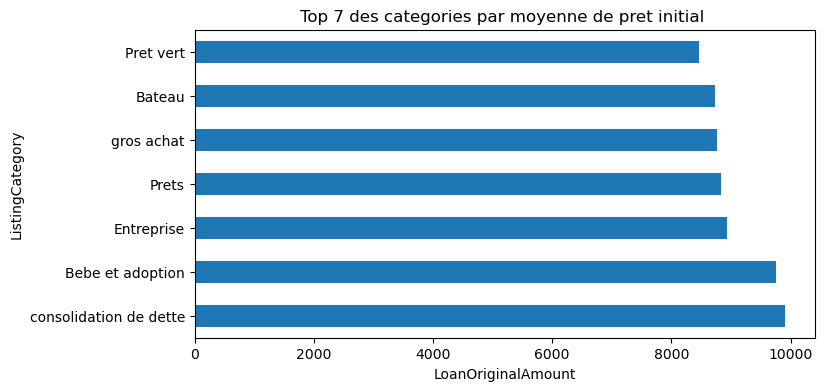

In [88]:
# taille de la figure
plt.figure(figsize =(8,4))

#On affiche la figure en annotant
Top7CatperAmount.plot(kind = 'barh', title ='Top 7 des categories par moyenne de pret initial ')
plt.xlabel('LoanOriginalAmount');

> Les credits qui portent sur de forts montants initiaux sont soit des consolidations de dette soit des demandes de pret pour bebe ou adoption

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [89]:
# On extrait les 3 statuts de pret completed, current et final payment progress
LoanRentable = df_loan_clean[df_loan_clean.LoanStatus.isin(['Completed','Current','FinalPaymentInProgress'])]
# On extrait les 10 meilleurs occupations
Loan10occ = LoanRentable[LoanRentable.Occupation.isin(['Scientist', 'Architect', 'Engineer - Electrical',
                  'Attorney', 'Pilot - Private/Commercial',
                  'Computer Programmer', 'Engineer - Chemical', 'Pharmacist',
                  'Doctor', 'Judge'])]

In [90]:
# On cree la categorie occ10_type
occ10_type = pd.CategoricalDtype(categories = ['Scientist', 'Architect', 'Engineer - Electrical',
                 'Attorney', 'Pilot - Private/Commercial',
                  'Computer Programmer', 'Engineer - Chemical', 'Pharmacist',
                  'Doctor', 'Judge'], ordered =True)

In [91]:
#On change le type de la colonne occupation
Loan10occ.Occupation = Loan10occ['Occupation'].astype(occ10_type)

In [92]:
Loan10occ.Occupation.value_counts()

Computer Programmer           3990
Engineer - Electrical         1003
Attorney                       988
Doctor                         450
Scientist                      345
Pharmacist                     230
Engineer - Chemical            201
Pilot - Private/Commercial     186
Architect                      185
Judge                           21
Name: Occupation, dtype: int64

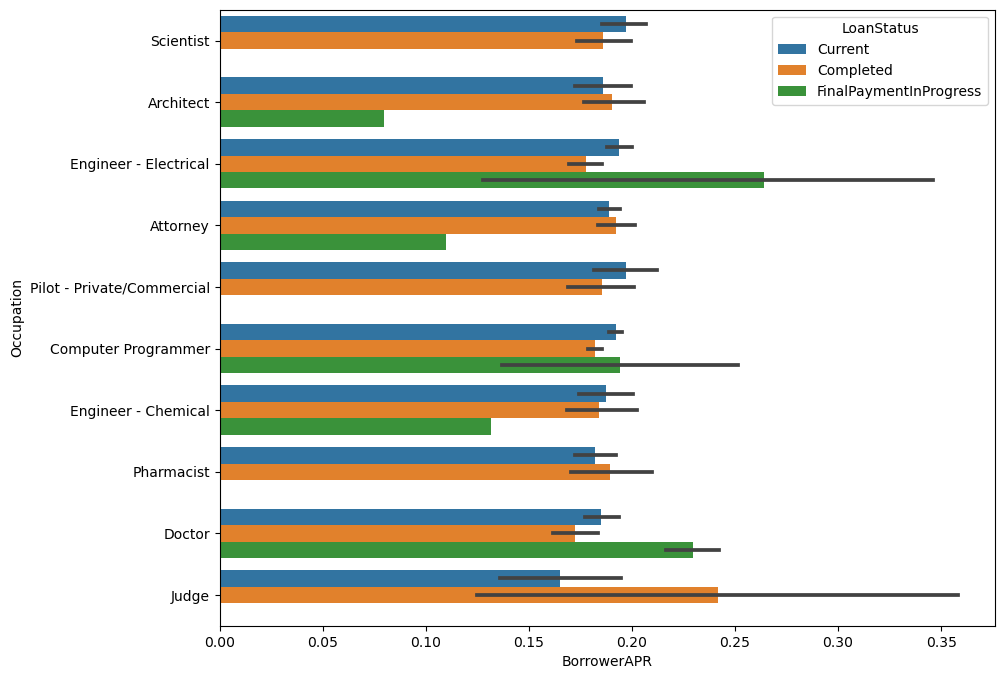

In [93]:
# On trace la figure de diagramme groupe mutivaries
plt.figure(figsize =(10, 8))
sb.barplot(data = Loan10occ , y = 'Occupation', x = 'BorrowerAPR',orient ='h', hue = 'LoanStatus');

In [94]:
# On extrait les 3 notes de credits AA, A et B 
Bestscore = df_loan_clean.query('CreditRating in ["AA","A","B"]')
Best_type = pd.CategoricalDtype(categories = ["AA","A","B"], ordered =True)
Bestscore.CreditRating = Bestscore['CreditRating'].astype(Best_type)

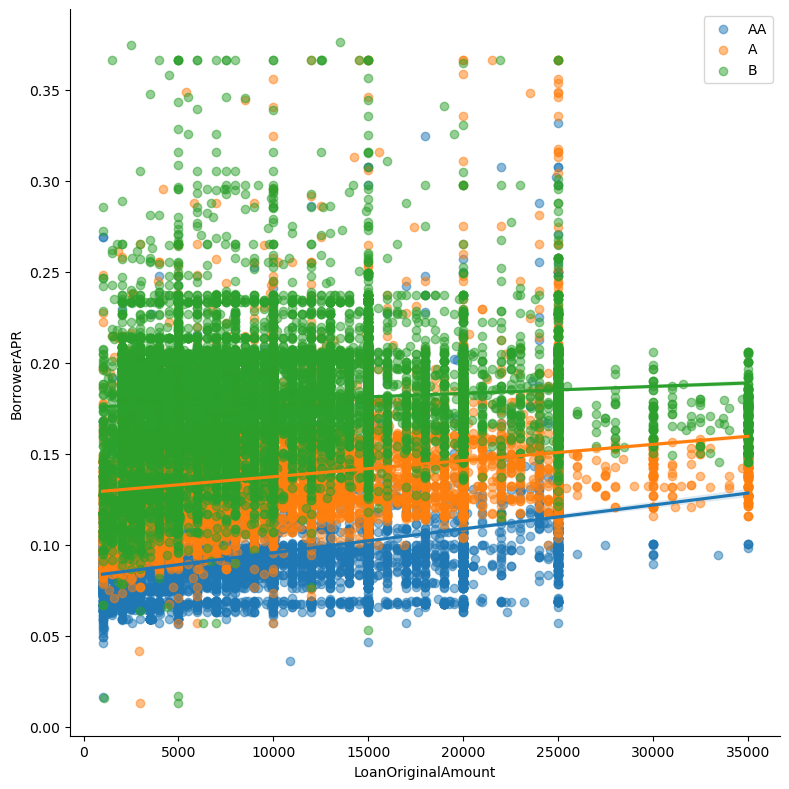

In [95]:
# On trace la figure
g = sb.FacetGrid(data = Bestscore, hue = 'CreditRating', height = 8)
g.map(sb.regplot, 'LoanOriginalAmount','BorrowerAPR', scatter_kws = {'alpha':1/2})
#g.set(xscale = 'log') # need to set scaling before customizing ticks
#x_ticks = [1000, 1300, 1700, 1900, 3000, 7000, 10000]
#g.set(xticks = x_ticks, xticklabels = x_ticks)
#g.add_legend()
plt.legend();

Globalement les credit B sont les plus interessant car ils offres des taux annuels et des montants plus elevees a l'origine.

## Conclusions
>A partir des visualisations effectuées, nous avons observé que:
> Les paramètres tel que __'IncomeRange', ''EmploymentStatus','LP_CustomerPayments', 'LoanOriginationQuarter'__ affectent le statut d'un pret ou 'LoanStatus'


> Les paramètres comme __'CreditRating', 'Investors','BorrowerState' et 'Occupation'__ eux affectent le taux d'un emprunteur


> De ce fait on a observé que les métiers les plus rentables pour un pret sont les juges, les ingénieurs de tout genre et les médecins, soit des employés avec un revenu modérément élevé.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

